# Estudo da Assortatividade dos grafos de co-autoria da URFN relacionados as ODS

In [1]:
!pip install networkx
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:000m eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.1 MB/s eta 0:00:00 MB/s eta 0:00:011
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 10.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.0 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.4 MB/s eta 0:00:0031m19.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 17.3 MB/s eta 0:00:0031m18.5 MB/s eta 0:00:01


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [25]:
# Criando funções auxialiares

def create_graph(dataframe):
    """
        função para criar o grafo de co-autoria

        args:
            - dataframe: dataframe relacionado a ODS
            
        return:
            - graph: grafo de co-autoria
    """
    graph = nx.Graph()

    for index, row in dataframe.iterrows():
        autores = row["Authors"].split(";")
        for autor in autores:
            graph.add_node(autor)
    
        for i, autor1 in enumerate(autores):
            for j, autor2 in enumerate(autores):
                if j != i:
                    graph.add_edge(autor1,autor2)
        
    return graph

def plot_graph(graph,titulo, mode="spring"):
    """
        função para plotar o grafo

        args:
            - graph: grafo a ser plotado
            - titulo: titulo da imagem do grafo a ser plotado
            - mode: tipo de visualização que o grafo será visualizado (spring,circular,kamada)

        return:
            - None
    """
    # Plotando o grafo com um layout diferente
    plt.figure(figsize=(12, 10))
    
    # Experimente diferentes layouts: spring_layout, circular_layout, kamada_kawai_layout
    if mode == "spring":
        pos = nx.spring_layout(graph, k=0.1)  # Ajuste o parâmetro 'k' conforme necessário
    elif mode == "circular":
        pos = nx.circular_layout(graph)
    elif mode == "kamada":
        pos = nx.kamada_kawai_layout(graph)
    
    # Ajustando estilos
    nx.draw(graph, pos, with_labels=False, node_size=50, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray", width=1, alpha=1)
    plt.title(titulo)
    plt.show()

def calculate_graph_metrics(G):
    """
        Função para calcular as metricas de um grafo

        args:
            - G: grafo a ser usado para recuperar as metricas

        return:
            - metrics: metricas obtidas do grafo passado como argumento
    """
    metrics = {}
    metrics['num_nodes'] = G.number_of_nodes()
    metrics['num_edges'] = G.number_of_edges()
    metrics['average_degree'] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    metrics['density'] = nx.density(G)
    metrics['assortativity'] = nx.degree_assortativity_coefficient(G)
    metrics['average_clustering'] = nx.average_clustering(G)
    return metrics

def plot_degree_assortativity(G, title, ax):
    """
        Função para calcular a assortatividade em relação ao grau dos nós

        args:
            - G: grafo a ser trabalhado
            - title: nome da ODS que será apresentado no titulo
            - ax: lista que indicará a posição em que o gráfico ficará no grid. ex: [0,0] - canto superior esquerdo

        return:
            - None;
    """
    degree = dict(G.degree())
    degree_assortativity = nx.degree_assortativity_coefficient(G)

    x = []
    y = []

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if len(neighbors) > 0:
            avg_neighbor_degree = sum(degree[neighbor] for neighbor in neighbors) / len(neighbors)
            x.append(degree[node])
            y.append(avg_neighbor_degree)

    sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'}, ax=ax)
    ax.set_yscale('log')
    ax.set_xlabel('Grau do Nó')
    ax.set_ylabel('Grau Médio dos Vizinhos (log)')
    ax.set_title(f'Assortatividade de Grau ({title}): {degree_assortativity:.4f}')
    ax.set_xlim(right=250)
    ax.set_xlim(left=0)
    ax.set_ylim(top=500)
    ax.grid(True)

## GRAFO ODS 1 - Erradicação da Pobreza

metricas do grafo ODS 1 = 
 {'num_nodes': 432, 'num_edges': 1622, 'average_degree': 7.5092592592592595, 'density': 0.0174228753115064, 'assortativity': 0.9009291378661549, 'average_clustering': 0.8827279495589044}


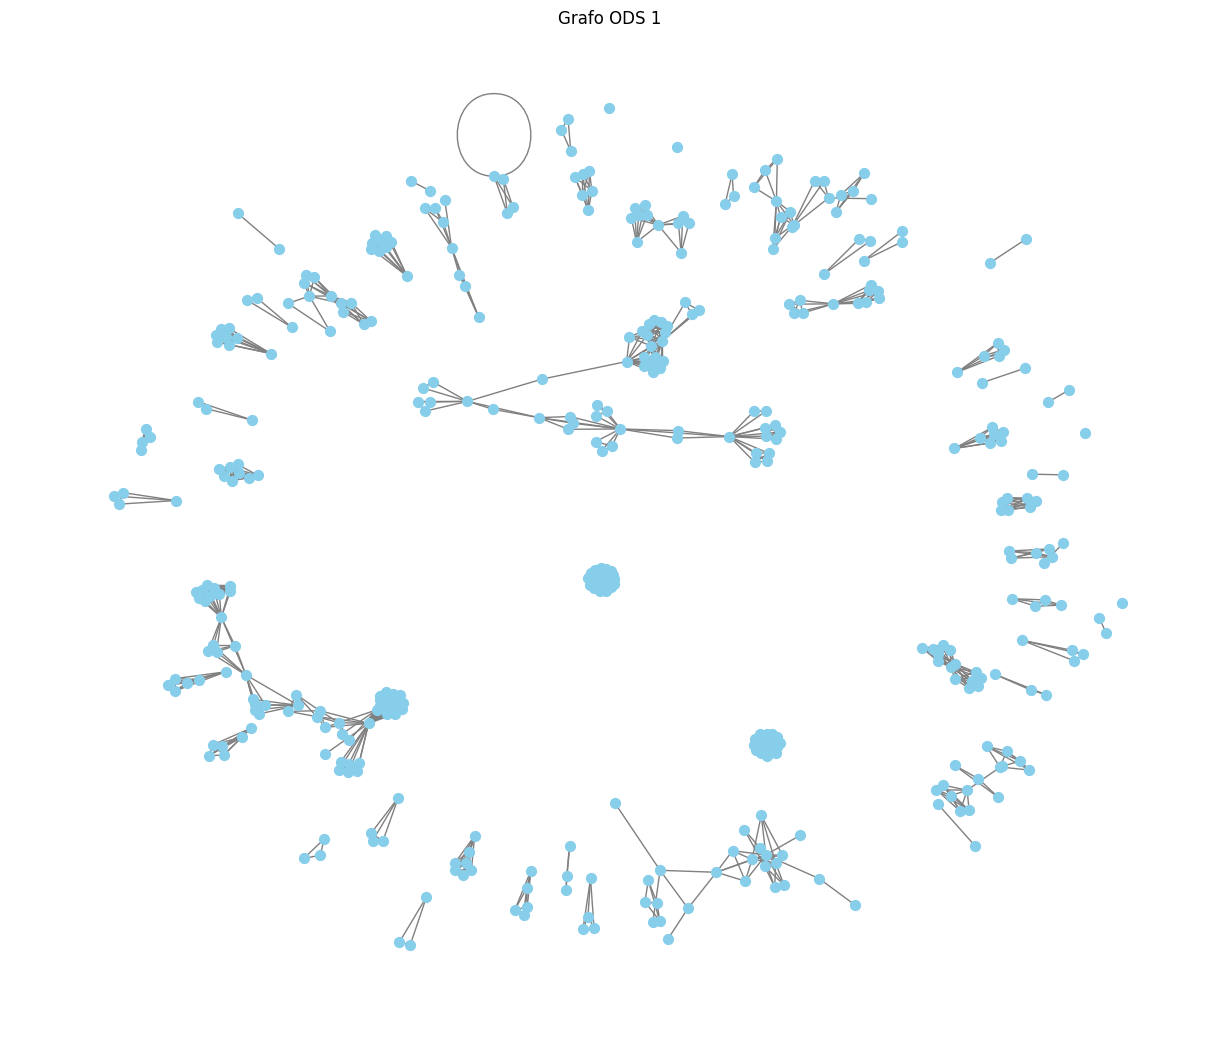

In [4]:
# obtendo o dataframe da ods_1
data_frame1 = pd.read_csv('../datasets/ods_1.csv')

# criando o grafo da ods_1
ods1_graph = create_graph(data_frame1)

# metricas do grafo
metrics_ods1_graph = calculate_graph_metrics(ods1_graph)
print(f'metricas do grafo ODS 1 = \n {metrics_ods1_graph}')

# plotando o grafo
plot_graph(ods1_graph, titulo="Grafo ODS 1")

## GRAFO ODS 2 - Fome Zero e Agricultura Sustentável

metricas do grafo ODS 2 = 
 {'num_nodes': 1869, 'num_edges': 45126, 'average_degree': 48.28892455858748, 'density': 0.0258506020120918, 'assortativity': 0.9886121325908488, 'average_clustering': 0.945776740244136}


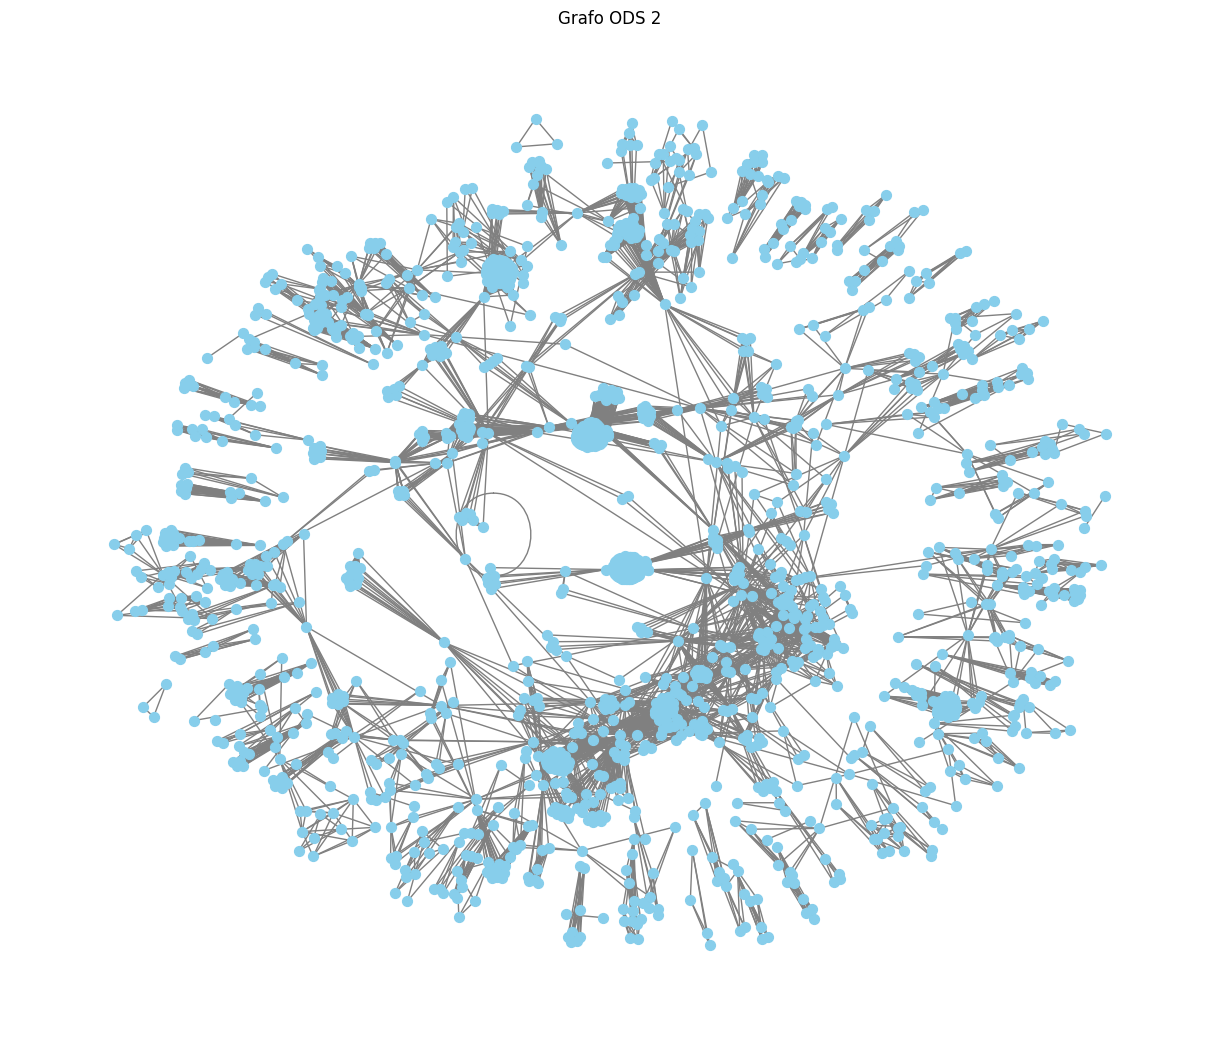

In [5]:
# obtendo o dataframe da ods_1
data_frame2 = pd.read_csv('../datasets/ods_2.csv')

# criando o grafo da ods_1
ods2_graph = create_graph(data_frame2)
        
# metricas do grafo
metrics_ods2_graph = calculate_graph_metrics(ods2_graph)
print(f'metricas do grafo ODS 2 = \n {metrics_ods2_graph}')

# plotando o grafo
plot_graph(ods2_graph, titulo="Grafo ODS 2")

## GRAFO ODS 9: Indústria, Inovação e Infraestrutura

metricas do grafo ODS 9 = 
 {'num_nodes': 1825, 'num_edges': 6119, 'average_degree': 6.7057534246575345, 'density': 0.0036763999038692623, 'assortativity': 0.0797726633617647, 'average_clustering': 0.9100807926418003}


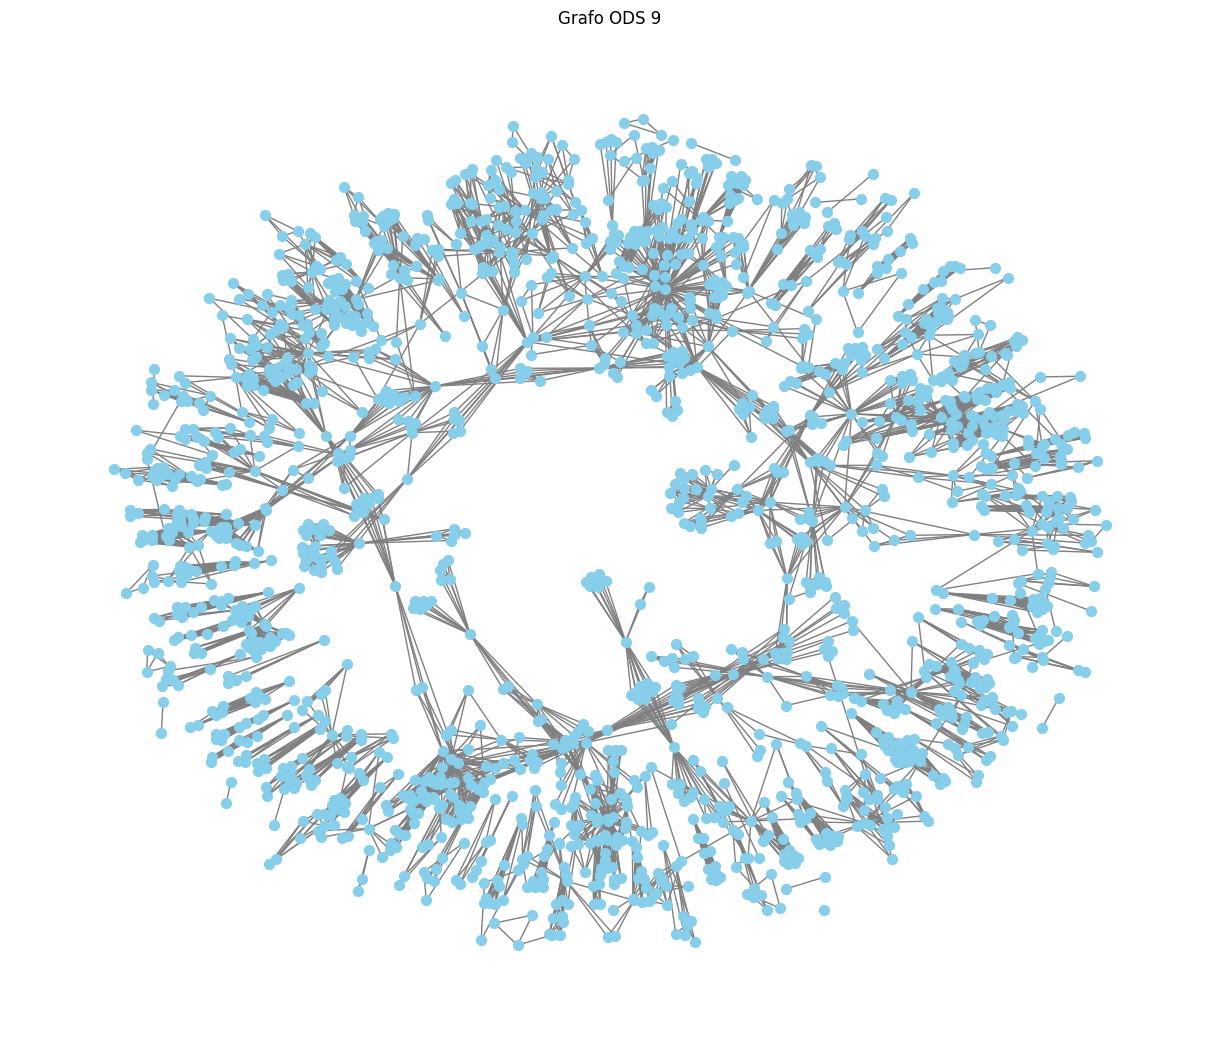

In [6]:
# obtendo o dataframe da ods_1
data_frame9 = pd.read_csv('../datasets/ods_9.csv')

# criando o grafo da ods_1

ods9_graph = create_graph(data_frame9)
        
# metricas do grafo
metrics_ods9_graph = calculate_graph_metrics(ods9_graph)
print(f'metricas do grafo ODS 9 = \n {metrics_ods9_graph}')

# plotando o grafo
plot_graph(ods9_graph, titulo="Grafo ODS 9")

## GRAFO ODS 11: Cidades e Comunidades Sustentáveis

metricas do grafo ODS 11 = 
 {'num_nodes': 2095, 'num_edges': 39679, 'average_degree': 37.879713603818615, 'density': 0.018089643554832193, 'assortativity': 0.9974342960857882, 'average_clustering': 0.9115389619743167}


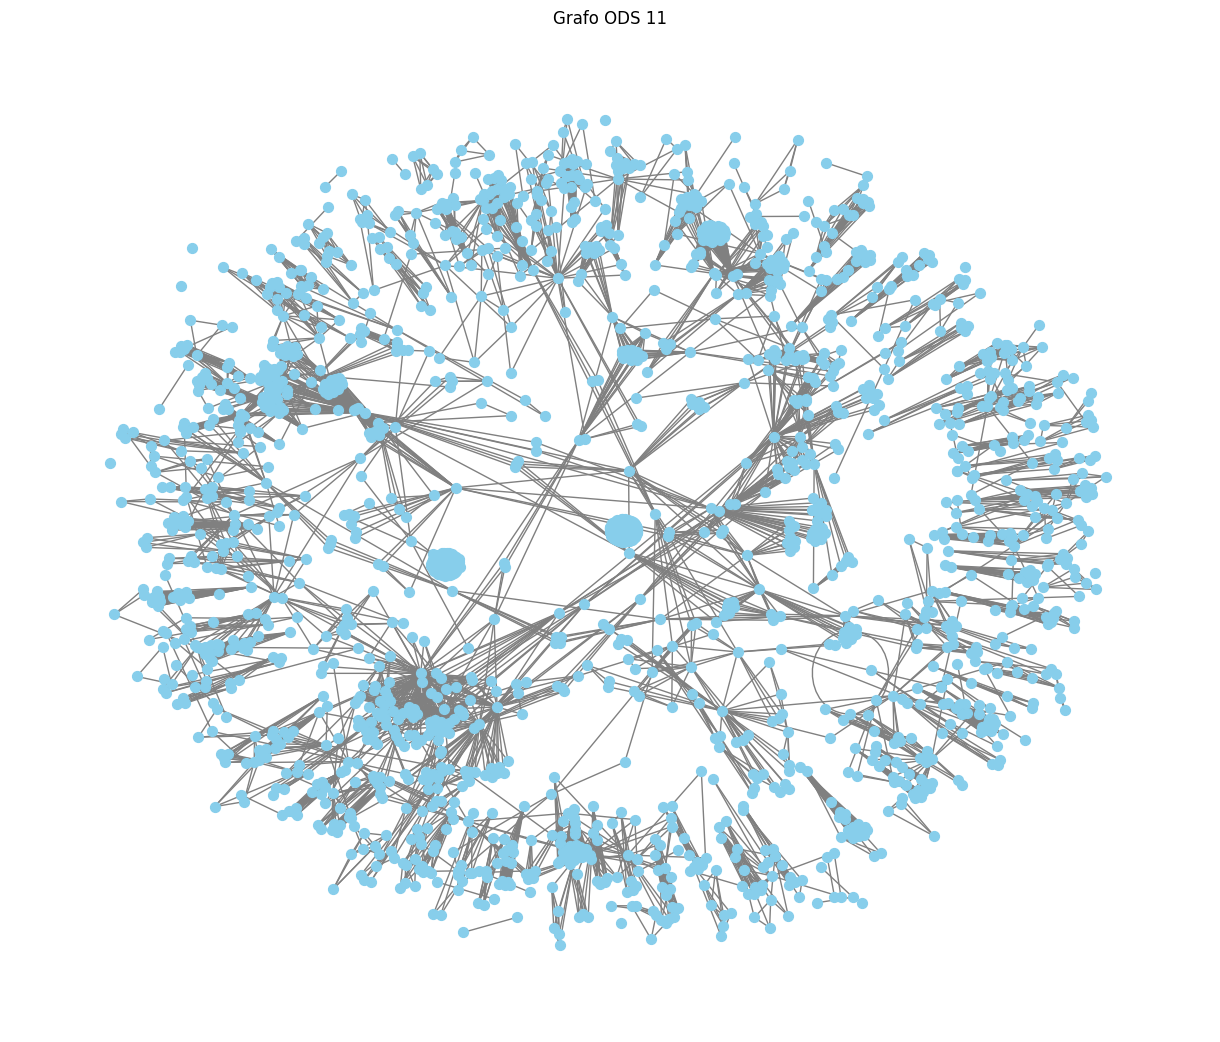

In [7]:
# obtendo o dataframe da ods_1
data_frame11 = pd.read_csv('../datasets/ods_11.csv')

# criando o grafo da ods_1
ods11_graph = create_graph(data_frame11)
        
# metricas do grafo
metrics_ods11_graph = calculate_graph_metrics(ods11_graph)
print(f'metricas do grafo ODS 11 = \n {metrics_ods11_graph}')

# plotando o grafo
plot_graph(ods11_graph, titulo="Grafo ODS 11")

## Obtendo o gráfico bipartido sobre a assortatividade em relação ao grau dos nós da rede

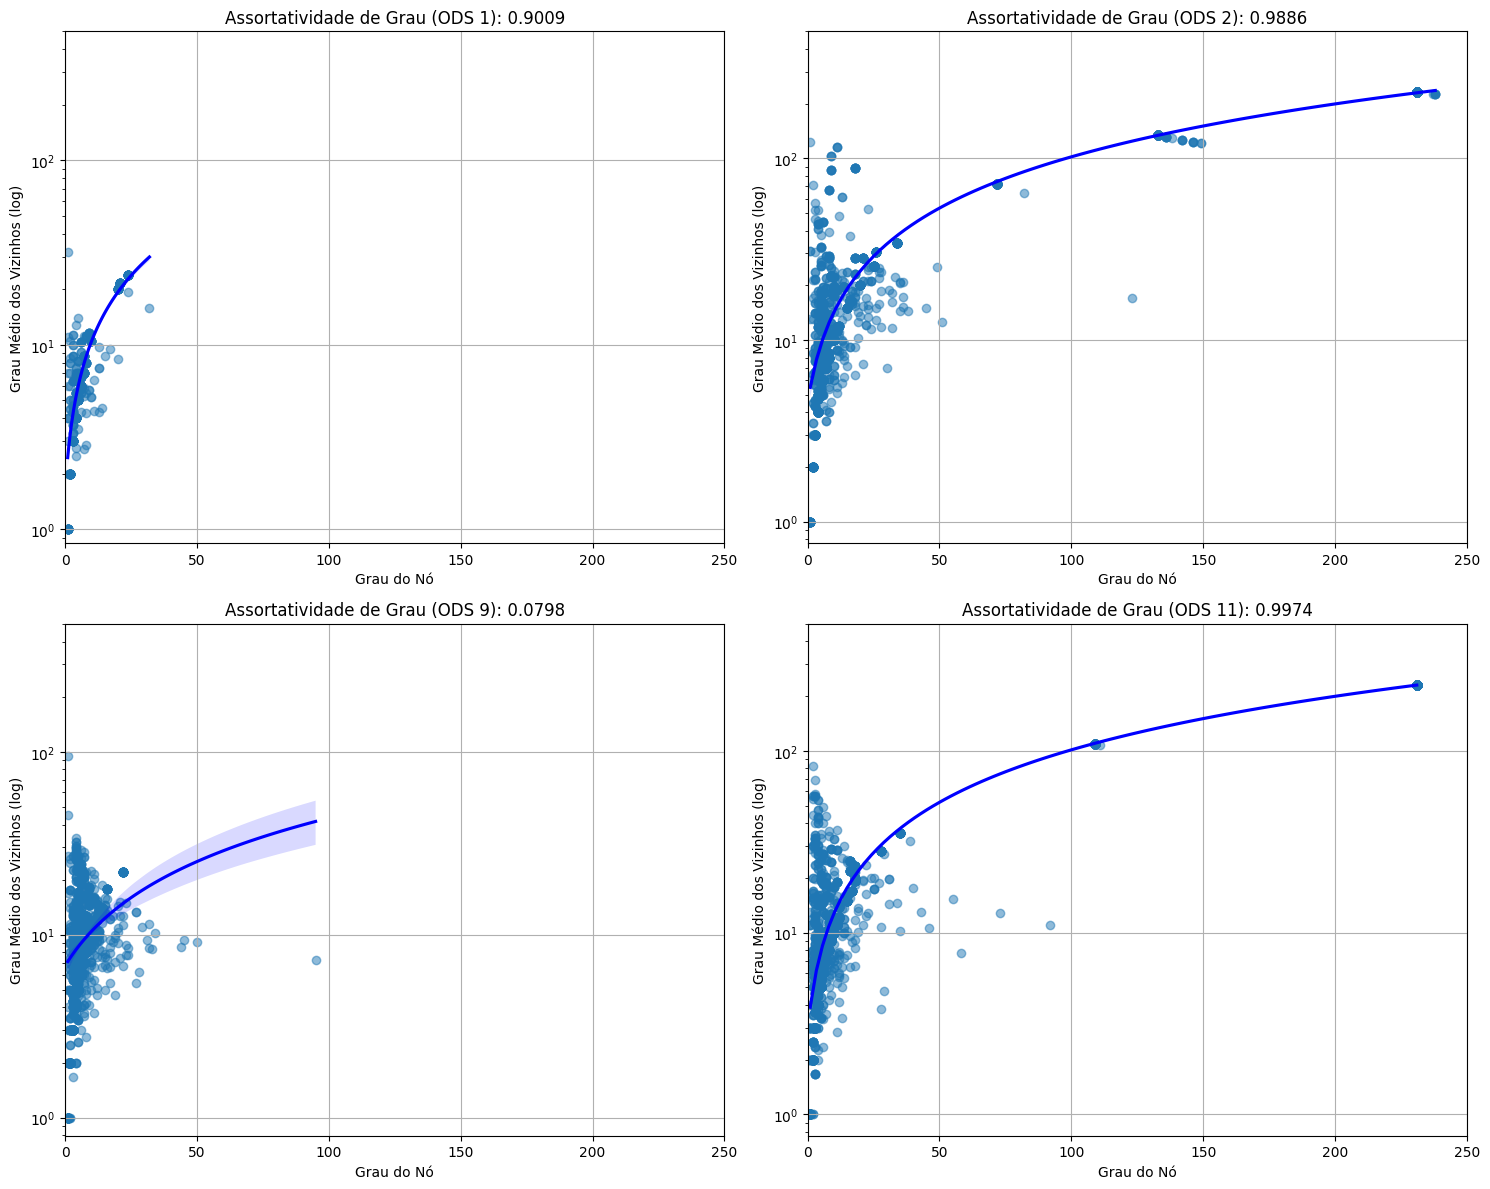

In [26]:
# Criar um layout de grid para os gráficos de dispersão
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plotar cada ODS
plot_degree_assortativity(ods1_graph, "ODS 1", axs[0, 0])
plot_degree_assortativity(ods2_graph, "ODS 2", axs[0, 1])
plot_degree_assortativity(ods9_graph, "ODS 9", axs[1, 0])
plot_degree_assortativity(ods11_graph, "ODS 11", axs[1, 1])

plt.tight_layout()
plt.show()